# Desafío 2

## Punto 1: estimar un modelo de regresión lineal que realice predicciones para el precio por metro cuadrado

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline
# importo modulos

In [0]:
df = pd.read_csv('prop_clean.csv')
df.shape

(76071, 25)

1- Primero creo las variables para el modelo: (i) Dummies a partir de la variables "Description", ubicacion y tipo de propiedad, (ii) m2 totales al cuadrado y m2 descubiertos (iii) Remplazo Nans por 0 cuando corresponda

In [0]:
# Miro cuales son las palabras que mas se repiten entre las propiedades caras

from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
df1=df.loc[df['p_m2_tot']>3300,'title']
X = vec.fit_transform(df1)
repe=pd.DataFrame(data = X.todense(), columns = vec.get_feature_names())
repe.transpose()
nuevo=repe.sum(axis=0)
nuevo.sort_values(ascending=False, inplace=True)
nuevo.head(200)

en               2404
departamento     1985
venta            1285
de                944
con               880
ambientes         846
palermo           591
cochera           550
amb               447
al                381
excelente         362
estrenar          332
belgrano          322
local             295
puerto            294
recoleta          279
madero            277
av                250
vista             246
la                237
olivos            227
torre             220
piso              214
000               211
monoambiente      199
por               192
edificio          188
amenities         178
ubicado           165
del               164
                 ... 
grande             21
urquiza            20
2200               20
golf               20
años               20
1200               20
parrilla           20
gurruchaga         20
departamentos      20
antigüedad         20
500                19
agüero             19
suites             19
cerviño            19
alquiler  

Filtrado por Capital Federal

In [0]:
# Genero las funciones para armar las dummies de las palabras representativas

def carga_dummy(s):
    s=str(s)
    matches = re.findall(pattern, s,re.IGNORECASE)
    if matches:
        return 1
    else:
        return 0


In [0]:
# Genero una dummy por palabra o conjunto de palabras similares
pattern=r'(alvear)'
df['alvear']=df['description'].apply(carga_dummy)
pattern=r'(aterrazado|tarraza)'
df['aterrazado']=df['description'].apply(carga_dummy)
pattern=r'(barrancas)'
df['barrancas']=df['description'].apply(carga_dummy)
pattern=r'(categoria)'
df['categoria']=df['description'].apply(carga_dummy)
pattern=r'(cerviño)'
df['cerviño']=df['description'].apply(carga_dummy)
pattern=r'(complejo)'
df['complejo']=df['description'].apply(carga_dummy)
pattern=r'(espectacular)'
df['espectacular']=df['description'].apply(carga_dummy)
pattern=r'(excelente)'
df['excelente']=df['description'].apply(carga_dummy)
pattern=r'(exclusivo|exclusiva)'
df['exclusiva']=df['description'].apply(carga_dummy)
pattern=r'(golf)'
df['golf']=df['description'].apply(carga_dummy)
pattern=r'( gran)'
df['gran']=df['description'].apply(carga_dummy)
pattern=r'(impecable)'
df['impecable']=df['description'].apply(carga_dummy)
pattern=r'(inmejorable)'
df['inmejorable']=df['description'].apply(carga_dummy)
pattern=r'(juncal)'
df['juncal']=df['description'].apply(carga_dummy)
pattern=r'(lago)'
df['lago']=df['description'].apply(carga_dummy)
pattern=r'(libertador)'
df['libertador']=df['description'].apply(carga_dummy)
pattern=r'(loft)'
df['loft']=df['description'].apply(carga_dummy)
pattern=r'(lumiere)'
df['lumiere']=df['description'].apply(carga_dummy)
pattern=r'(luminoso)'
df['luminoso']=df['description'].apply(carga_dummy)
pattern=r'(nordelta)'
df['nordelta']=df['description'].apply(carga_dummy)
pattern=r'(palacio)'
df['palacio']=df['description'].apply(carga_dummy)
pattern=r'(palermo)'
df['palermo']=df['description'].apply(carga_dummy)
pattern=r'(panoramica)'
df['panoramica']=df['description'].apply(carga_dummy)
pattern=r'(pileta)'
df['pileta']=df['description'].apply(carga_dummy)
pattern=r'(piscina|pisina)'
df['piscina']=df['description'].apply(carga_dummy)
pattern=r'(planta)'
df['planta']=df['description'].apply(carga_dummy)
pattern=r'(playa)'
df['playa']=df['description'].apply(carga_dummy)
pattern=r'(plaza)'
df['plaza']=df['description'].apply(carga_dummy)
pattern=r'(premium)'
df['premium']=df['description'].apply(carga_dummy)
pattern=r'(renoir)'
df['renoir']=df['description'].apply(carga_dummy)
pattern=r'( río | rio )'
df['rio']=df['description'].apply(carga_dummy)
pattern=r'(suite)'
df['suite']=df['description'].apply(carga_dummy)
pattern=r'(tower)'
df['tower']=df['description'].apply(carga_dummy)
pattern=r'(view)'
df['view']=df['description'].apply(carga_dummy)
pattern=r'(vista)'
df['vista']=df['description'].apply(carga_dummy)
pattern=r'(yacht)'
df['yacht']=df['description'].apply(carga_dummy)


In [0]:
# Genero dummy de ubicacion: una por provincia y una por barrio de capital federal
df['dummy']=df.loc[df['ciudad']=='Capital Federal','localidad']
df.loc[df['dummy'].isnull(),'dummy']=df['provincia']
df.loc[df['barrio'].isnull()==False,'dummy']=df['barrio']


In [0]:
dummies = pd.get_dummies(df['dummy']).iloc[: , 1:]
df = pd.concat([df, dummies], axis=1)

In [0]:
# Genero dummy de tipo de propiedad
tipo = pd.get_dummies(df['property_type']).iloc[: , 1:]
df = pd.concat([df, tipo], axis=1)

In [0]:

# Genero metros descubiertos y m2 totales al cuadraod
df['m2_desc']=df['m2_tot']-df['m2_cub']
df['m2_tot2']=df['m2_tot']*df['m2_tot']

df.loc[df['m2_desc']==0,'m2_desc']=1
df['m2_desc2']=df['m2_desc']*df['m2_desc']

df['ln_m2_tot']=np.log(df['m2_tot'])
df['ln_m2_tot2']=np.log(df['m2_tot2'])

df['ln_m2_desc']=np.log(df['m2_desc'])
df['ln_m2_desc2']=np.log(df['m2_desc2'])


In [0]:
# Reemplazo NaNs por 0
df.loc[df['expenses'].isnull(),'expenses']=0
df.loc[df['floor'].isnull(),'floor']=0

In [0]:
df.shape

(76071, 173)

2- Miro la relacion entre variables

C:\Users\martinbrein\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\martinbrein\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\martinbrein\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


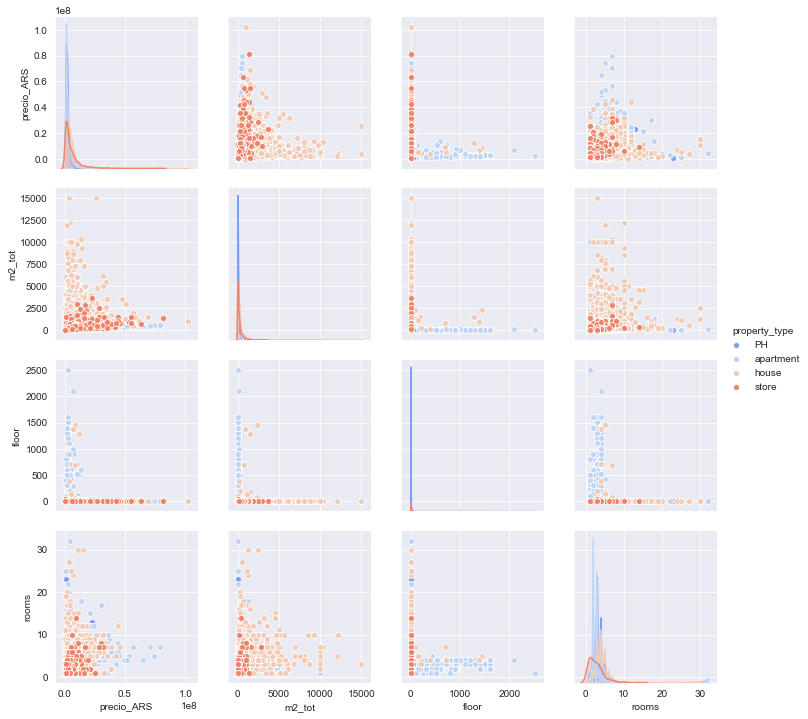

In [0]:
sns.set_style("darkgrid")
sns.pairplot(df[['property_type','precio_ARS','m2_tot','floor','rooms']], hue='property_type' , palette='coolwarm')

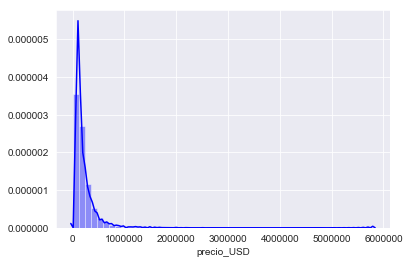

In [0]:
sns.distplot(df['precio_USD'],  color = "b")

3 - Modelo de Regresion Lineal

In [0]:
import sklearn
from sklearn.linear_model import LinearRegression

In [0]:
#Defino X: Recordar por def. dummies n-1, la columna excluida fue Agronomía y en property type fue excluida PH

X = df[['ln_m2_tot', 'ln_m2_tot2', 'ln_m2_desc', 'ln_m2_desc2', 'apartment', 'house', 'store',
       'expenses', 'floor', 'estrenar', 'garage',
       'Almagro', 'Balvanera', 'Barracas',
       'Barrio Norte', 'Belgrano', 'Boca', 'Boedo', 'Bs.As. G.B.A. Zona Norte',
       'Bs.As. G.B.A. Zona Oeste', 'Bs.As. G.B.A. Zona Sur',
       'Buenos Aires Costa Atlántica', 'Buenos Aires Interior', 'Caballito',
       'Catalinas', 'Catamarca', 'Centro / Microcentro', 'Chacarita', 'Chaco',
       'Chubut', 'Coghlan', 'Colegiales', 'Congreso', 'Constitución',
       'Corrientes', 'Córdoba', 'Entre Ríos', 'Flores', 'Floresta', 'Jujuy',
       'La Pampa', 'La Rioja', 'Las Cañitas', 'Liniers', 'Mataderos',
       'Mendoza', 'Misiones', 'Monserrat', 'Monte Castro', 'Neuquén', 'Nuñez',
       'Once', 'Palermo', 'Parque Avellaneda', 'Parque Centenario',
       'Parque Chacabuco', 'Parque Chas', 'Parque Patricios', 'Paternal',
       'Pompeya', 'Puerto Madero', 'Recoleta', 'Retiro', 'Río Negro',
       'Saavedra', 'Salta', 'San Cristobal', 'San Juan', 'San Luis',
       'San Nicolás', 'San Telmo', 'Santa Cruz', 'Santa Fe',
       'Santiago Del Estero', 'Tierra Del Fuego', 'Tribunales', 'Tucumán',
       'Velez Sarsfield', 'Versalles', 'Villa Crespo', 'Villa Devoto',
       'Villa General Mitre', 'Villa Lugano', 'Villa Luro', 'Villa Ortuzar',
       'Villa Pueyrredón', 'Villa Real', 'Villa Riachuelo', 'Villa Santa Rita',
       'Villa Soldati', 'Villa Urquiza', 'Villa del Parque', 
       'Palermo Hollywood', 'Palermo Soho', 'Palermo Chico', 'Palermo Viejo', 'Barrio El Golf', 
       'Barrio Los Castores', 'alvear', 'aterrazado',
       'barrancas','categoria','cerviño','complejo','espectacular','excelente','exclusiva',
       'golf','gran','impecable','inmejorable','juncal','lago','libertador','loft',
       'lumiere','luminoso','nordelta','palacio','palermo','panoramica','pileta','piscina',
       'planta', 'plaza','premium','renoir','rio','suite','tower','view','vista','yacht']]
X.shape

(76071, 133)

In [0]:
#Defino la variable Objetivo
y = df['p_m2_tot']

In [0]:
# Defino set de entrenamiento y se de testeo, estratificado por tipo de propiedad
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, stratify=X[['apartment','house']])

In [0]:
# Elijo el modelo y lo corro en el set de entrenamiento (modelo sin intercepto porque tengo mejor r2)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()  
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
#Valores de los coeficientes obtenidos
##Mostrar la significancia de cada variable
import statsmodels.api as sm
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:               p_m2_tot   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     1099.
Date:                Wed, 05 Jun 2019   Prob (F-statistic):               0.00
Time:                        14:06:38   Log-Likelihood:            -4.6841e+05
No. Observations:               60856   AIC:                         9.371e+05
Df Residuals:                   60724   BIC:                         9.383e+05
Df Model:                         131                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [0]:
# Armo una fucncion para que me muestre metricas y graficos del modelos
def metrica_modelo(test,pred):
    from sklearn import metrics
    print ('MAE:', metrics.mean_absolute_error(test, pred))
    print ('MSE:', metrics.mean_squared_error(test, pred))
    print ('RMSE:', np.sqrt(metrics.mean_squared_error(test, pred)))
    print ('R2:', metrics.r2_score(test, pred))
    
    plt.figure(figsize=(10,10))
    
    plt.subplot(211)
    sns.scatterplot(test, pred,alpha=0.5) 
    plt.title('Predccion vs Real')
    # Set x-axis label
    plt.xlabel('Real')
    # Set y-axis label
    plt.ylabel('Prediccion')


    plt.subplot(212)
    sns.distplot((test-pred))
    plt.title('Distribucion de predicciones')
    # Set x-axis label
    plt.xlabel('Prediccion')


    plt.tight_layout()

MAE: 389.3417821390949
MSE: 284811.17569428723
RMSE: 533.6770331336053
R2: 0.7027918991093313


C:\Users\Carolina\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


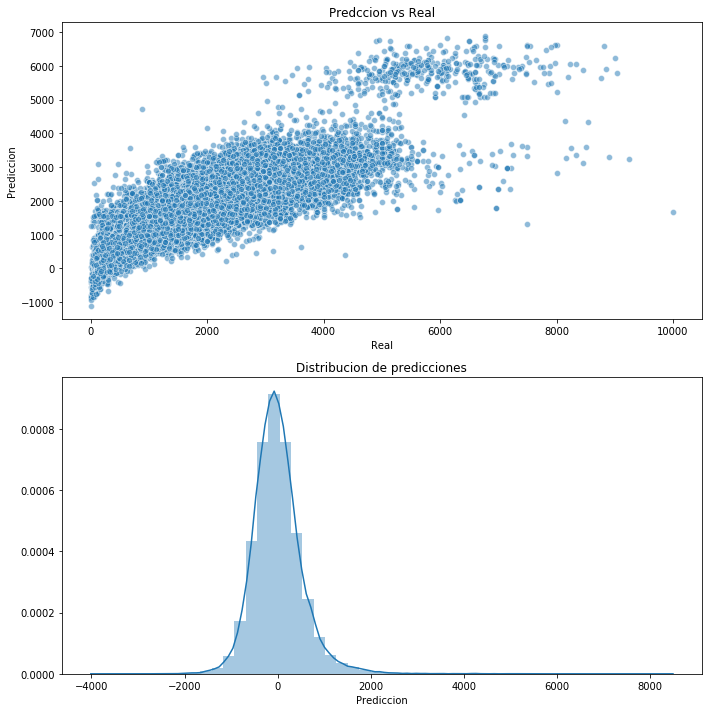

In [0]:
# Obtenemos las predicciones del precio en pesos y las comparamos con el test de prueba, 
# obteniendo valores coherentes en orden de magnitud. Miramos tb metricas y distribucion de los errores.
pred_train = lm.predict(X_train)
metrica_modelo(y_train,pred_train)

In [0]:
(pred_train<0).sum()

509

## Punto 2: hacer cross-validation del modelo

MAE: 392.0223478323192
MSE: 287029.57852207083
RMSE: 535.7514148577405
R2: 0.6987600126149376


C:\Users\Carolina\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



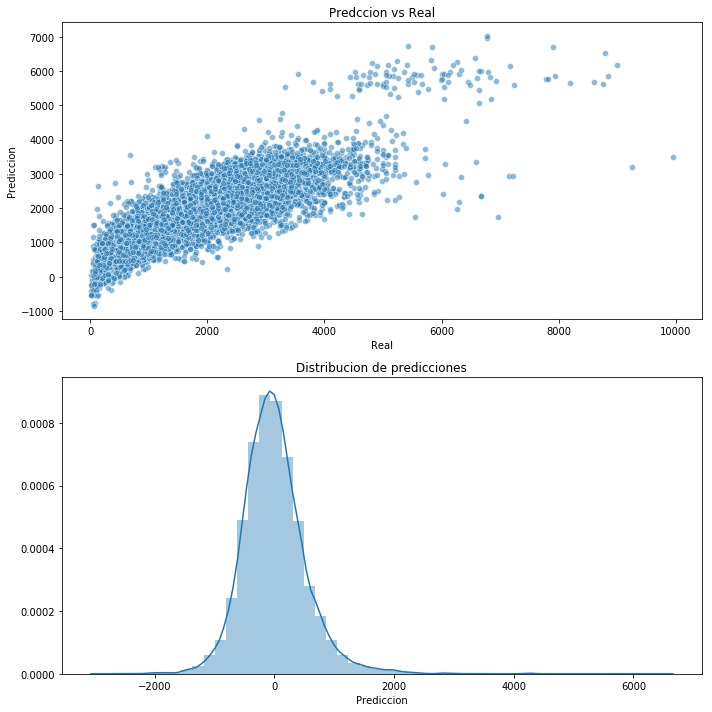

In [0]:
# Hacemos cross-validation con el set de testeo
pred_test = lm.predict(X_test)
metrica_modelo(y_test,pred_test)

### Desvío promedio por Provincia y Barrio de Capital Federal

In [0]:
# Agrego los valores de la prediccion a la base de datos total
lm.fit(X,y)
df['pred'] = lm.predict(X)

In [0]:
# Medida de ajuste por provincia 

df["fit_prov"]=abs(df['pred']-df["p_m2_tot"])/df['p_m2_tot']
 
df['barrio_caba']=df.loc[df['provincia']=='Capital Federal','localidad']

df["fit_barrio"]=abs(df.loc[df['barrio_caba'].isnull()==False,'pred']-df.loc[df['barrio_caba'].isnull()==False,'p_m2_tot'])/df.loc[df['barrio_caba'].isnull()==False,'p_m2_tot']


C:\Users\Carolina\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


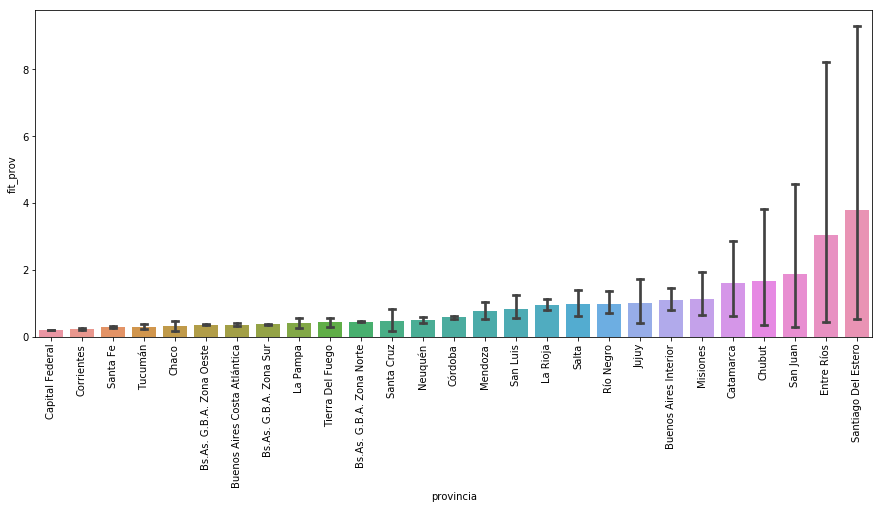

In [0]:
# Preccio promedio por provincia
plt.subplots(figsize=(15,6))
plt.xticks(rotation = 90)
zonas = df.groupby('provincia').mean().sort_values('fit_prov').index
sns.barplot(x="provincia", y="fit_prov", order=zonas, data=df, capsize=.2)

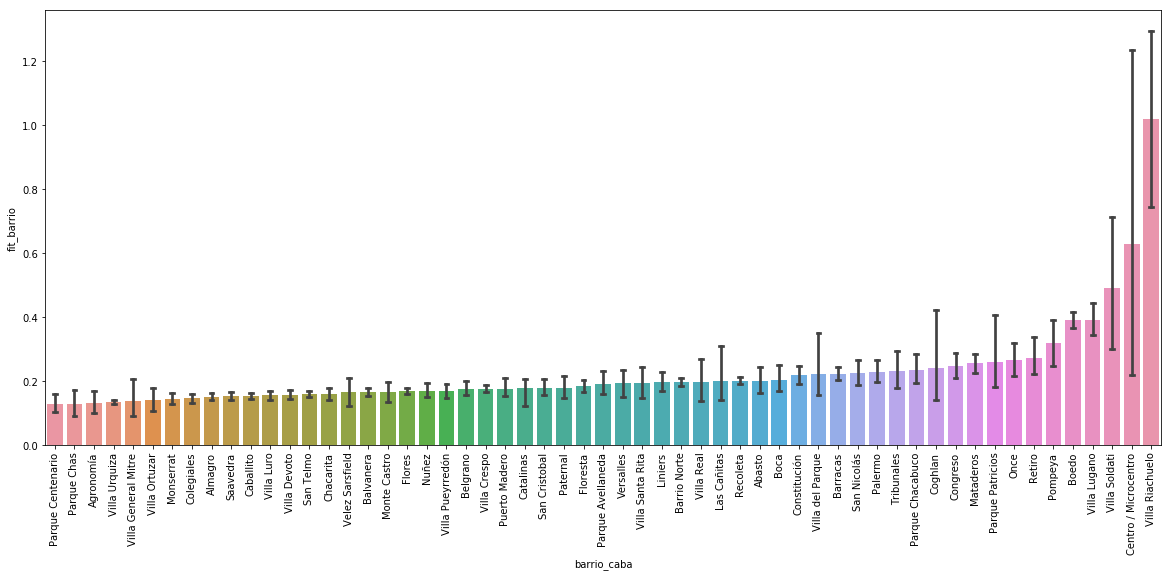

In [0]:
# Preccio promedio por provincia
plt.subplots(figsize=(20,8))
plt.xticks(rotation = 90)
zonas = df.groupby('barrio_caba').mean().sort_values('fit_barrio').index
sns.barplot(x="barrio_caba", y="fit_barrio", order=zonas, data=df, capsize=.2);

## Punto 3: modelos Ridge y LASSO

In [0]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [0]:
# Instanciamos los modelos
lm_ridge= RidgeCV(alphas=np.linspace(0.01,100, 1000), cv=2, normalize=True)
lm_lasso = LassoCV(alphas=np.linspace(0.001,0.01,100, 1000), cv=5, normalize=True)

In [0]:
lm_ridge.fit(X_train, y_train)

RidgeCV(alphas=array([1.00000e-02, 1.10090e-01, ..., 9.98999e+01, 1.00000e+02]),
    cv=2, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
    store_cv_values=False)

In [0]:
lm_lasso.fit(X_train, y_train)

LassoCV(alphas=array([0.001  , 0.00109, ..., 0.00991, 0.01   ]), copy_X=True,
    cv=5, eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100,
    n_jobs=None, normalize=True, positive=False, precompute='auto',
    random_state=None, selection='cyclic', tol=0.0001, verbose=False)

In [0]:
print('Alpha Ridge:',lm_ridge.alpha_,'\n'
      'Alpha LASSO:',lm_lasso.alpha_,'\n')

Alpha Ridge: 0.01 
Alpha LASSO: 0.01 



In [0]:
pred_ridge_train = lm_ridge.predict(X_train)
pred_lasso_train = lm_lasso.predict(X_train)
pred_ridge_test = lm_ridge.predict(X_test)
pred_lasso_test = lm_lasso.predict(X_test)

In [0]:
# Calculamos el R2 en el set de entrenamiento para poder comparar con el de testeo

print(" Score Train Lineal: %.5f\n" % metrics.r2_score(y_train,pred_train),
      "Score Train Ridge : %.5f\n" % lm_ridge.score(X_train, y_train),
      "Score Train Lasso : %.5f\n" %  lm_lasso.score(X_train, y_train))

# Calculamos el RMSE

rmse = lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred))

print(" Train RMSE lineal   : %.2f \n" % rmse(y_train,pred_train),
      "Train RMSE Ridge    : %.2f \n" % rmse(y_train,pred_ridge_train),
      "Train RMSE Lasso    : %.2f \n" % rmse(y_train,pred_lasso_train))

 Score Train Lineal: 0.70327
 Score Train Ridge : 0.70316
 Score Train Lasso : 0.70237

 Train RMSE lineal   : 532.76 
 Train RMSE Ridge    : 532.86 
 Train RMSE Lasso    : 533.57 



In [0]:
# Calculamos el R2 en el set de testeo

print(" Score Test Lineal: %.5f\n" %  metrics.r2_score(y_test,pred_test),
      "Score Test Ridge : %.5f\n" % metrics.r2_score(y_test,pred_ridge_test),
      "Score Test Lasso : %.5f\n" %  metrics.r2_score(y_test,pred_lasso_test))

# Calculamos el RMSE en el set de testeo

rmse = lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred))

print(" Test RMSE lineal   : %.2f \n" % rmse(y_test,pred_test),
      "Test RMSE Ridge    : %.2f \n" % rmse(y_test,pred_ridge_test),
      "Test RMSE Lasso    : %.2f \n" % rmse(y_test,pred_lasso_test))

 Score Test Lineal: 0.69876
 Score Test Ridge : 0.69727
 Score Test Lasso : 0.69726

 Test RMSE lineal   : 535.75 
 Test RMSE Ridge    : 537.08 
 Test RMSE Lasso    : 537.09 



## Punto 4: Seleccionar mediante muestreo aleatorio simple una submuestra de 100 propiedades. 

In [0]:
# Agrego los valores de la prediccion a la base de datos total

#Ya se realizo en el punto 2

#lm.fit(X,y)
#df['pred'] = lm.predict(X)

In [0]:
#Creo una columna con el precio total en dolares de la prediccion
df['precio_pred']=df['pred']*df['m2_tot']

In [0]:
#Creo una columna con la diferencia entre precios y otra con el porcentaje que representa esa diferencia
df['dif_precios']=df['precio_pred']-df['precio_USD']
df['porcenaje']=df['dif_precios']/df['precio_USD']

In [0]:
#definimos la mascara a utilizar para los criterios de busqueda
mask = (df['provincia']=='Capital Federal') & (df['property_type']=='apartment')

In [0]:
#Creo el portafolio de propiedades
portafolio=df.loc[mask].sample(100)

In [0]:
#defino nuestro capital inicial
capital_total=portafolio['precio_USD'].sum()
capital_pred=portafolio['precio_pred'].sum()

In [0]:
print(capital_total)
print(capital_pred)

In [0]:
plt.figure(figsize=(8,8))

sns.set(style="whitegrid")
sns.barplot(x=['mercado','predicho'],y=[capital_total,capital_pred])

## Punto 5: Elijo propiedades con el capital resultante

In [0]:
#aplico la mascara definida para el portfolio
df_inversiones=df.loc[mask]

In [0]:
#Quito el portafolio del dataset
df_inversiones.drop(index=portafolio.index,inplace=True)

In [0]:
#Me quedo solo con las propiedades en las cuales la prediccion esta dentro de +- 30%
df_inversiones=df_inversiones.loc[(df_inversiones['porcenaje']>-0.3)&(df_inversiones['porcenaje']<0.3)]

In [0]:
#Ordeno el data set, dejando las propiedades mas sub-valuadas primero
#df_inversiones=df_inversiones.sort_values('dif_precios')
df_inversiones=df_inversiones.sort_values('porcenaje',ascending=False)

In [0]:
df_inversiones[['precio_USD','precio_pred','dif_precios','porcenaje']]

In [0]:
capital=capital_total
inversiones=[]

for index, x in df_inversiones.iterrows():
    precio=x['precio_USD']
    if ((capital-precio) <= 0):
        break
    else:
        #print(x)
        capital=capital-precio
        inversiones.append(index)

In [0]:
df_final=df_inversiones.loc[inversiones]

In [0]:
df_final.shape

In [0]:
valor_mercado=df_final['precio_USD'].sum()
valor_posible=df_final['precio_pred'].sum()
ganancia_posible = valor_posible-valor_mercado

print('valor mercado: {}'.format(valor_mercado))
print('valor posible: {}'.format(valor_posible))
print('ganancia posible: {}'.format(ganancia_posible))
print('porcentaje : {}'.format(ganancia_posible/valor_mercado))

In [0]:
plt.figure(figsize=(5,3))

sns.barplot(x=['mercado','modelo'],y=[valor_mercado,valor_posible])

In [0]:
df_final['localidad'].value_counts().values

In [0]:
plt.figure(figsize=(8,8))
sns.barplot(y=df_final['localidad'].value_counts().index,x=df_final['localidad'].value_counts().values)